# Non Normed

This experiment has the purpose of defining the number of clusters presented in the data. For that, we use the t-SNE for the projection of the data (dimensionality reduction), and an error metric to determine the best number of clusters. The metrics used are: square of the 2-norm distance metric, silhouette score and Davies-Bouldin Index.

Metrics such as adjusted rand index, mutual information based scores, homogeneity, completeness and V-measure can not be used in this work because they require the ground truth (true labels) of the data.

In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import reader as _reader
from src import visualization as _visualization
import numpy as np
import sklearn
from sklearn.cluster import KMeans

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
X = _reader.readWord2Vec(normed=False)
print(X[:10])
print(X.shape)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']
        0         1         2         3         4         5         6    \
0  0.013595 -0.068772 -0.013126  0.006024  0.037922 -0.020872 -0.010325   
1  0.025009 -0.025586  0.012237  0.020567  0.014523 -0.018705 -0.058395   
2  0.031544 -0.025882 -0.060617  0.035992  0.037742 -0.021132 -0.041023   
3  0.058714 -0.080251 -0.026101  0.060461  0.016714 -0.005205 -0.037441   
4  0.023366 -0.065667 -0.015601  0.022602  0.030365 -0.060590 -0.071055   
5  0.005894 -0.074649 -0.001171  0.014182  0.029530  0.025231 -0.022154   
6 -0.011415 -0.021273 -0.043368 -0.001785 -0.031960 -0.020326 -0.071195   
7  0.049307 -0.024540 -0.011390  0.010187  0.017417 -0.000969 -0.020045   
8  0.052583 -0.090634 -0.025581  0.003195  0.031459  0.002013  0.025611   
9  0.061589 -0.026826 -0.020978  0.046825  0.002022 -0.016367 -0.058929   

        7         8         9      ...          118       119       120  \
0  0.008019  0.0

In [3]:
best_K, Ks, Js = _optimizer.elbow_kmeans(X)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 0.13142188857296144
error = 0.13142188857296144
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 0.12108531390833442
error = 0.010336574664627021
###############################
Number of Clusters: 22
Starting K-means++
Finished
J = 0.11690855638100589
error = 0.004176757527328531
###############################

Best k: 22
Number of iterations: 4


J  [0.13142188857296144, 0.12108531390833442, 0.11690855638100589]
Ks  [2, 12, 22]


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

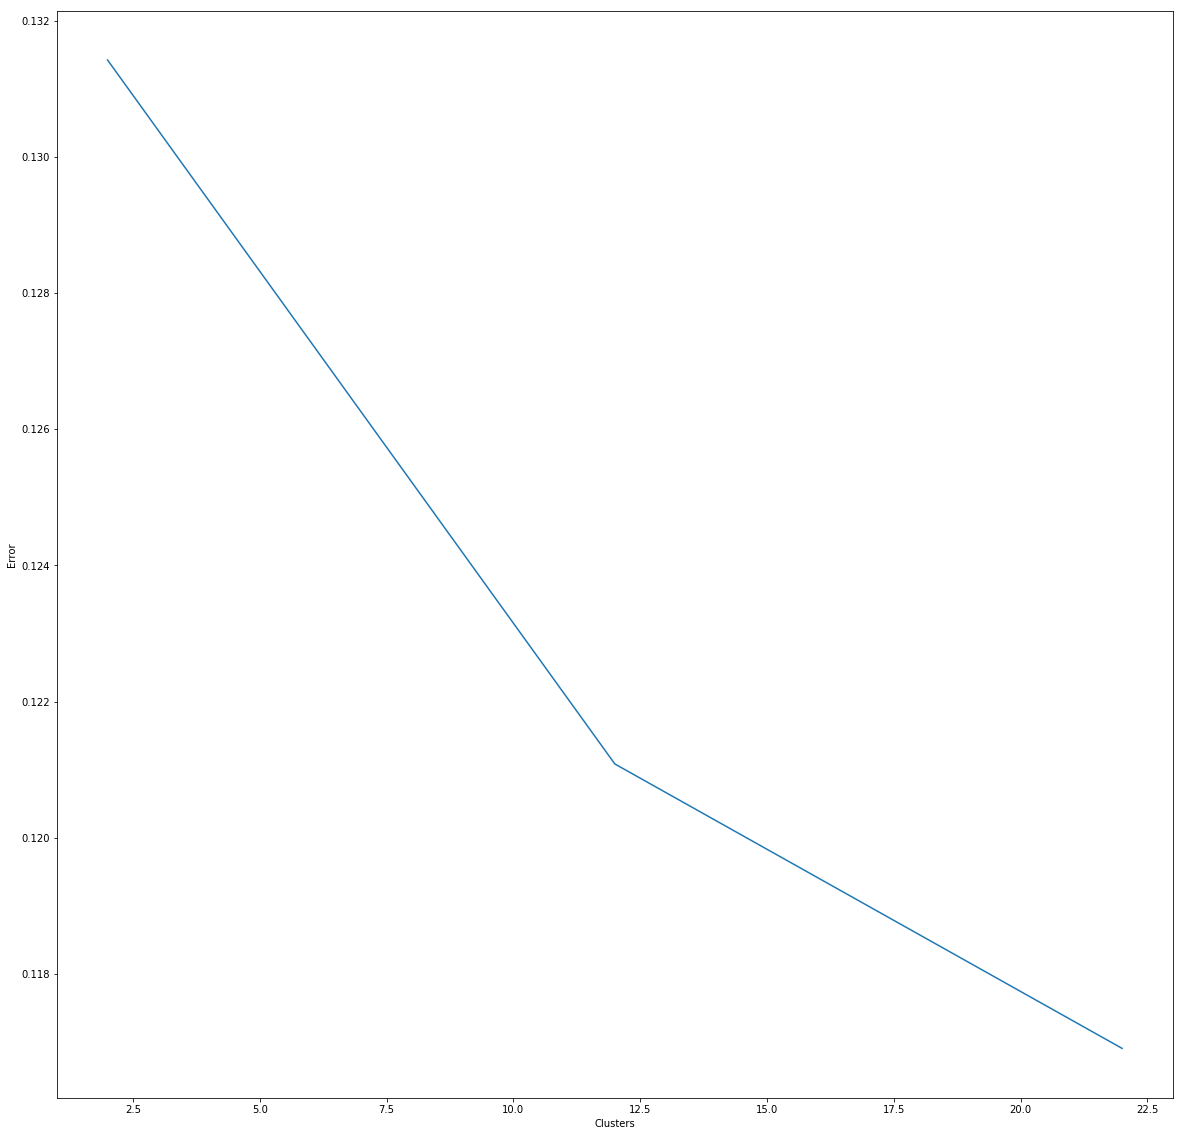

In [4]:
_visualization.plot_cluster_errors(Ks,Js)

## Refining the Search 
The error threshould was reach with 22 clusters, then we can refine our search while increasing the steps from 10 to 1. 


In [6]:
best_K, Ks, Js = _optimizer.elbow_kmeans(X, min_k=20, step=1)

###############################
Number of Clusters: 20
Starting K-means++
Finished
J = 0.11745751293356302
error = 0.11745751293356302
###############################
Number of Clusters: 21
Starting K-means++
Finished
J = 0.11731913190660916
error = 0.00013838102695386267
###############################

Best k: 21
Number of iterations: 3


J  [0.11745751293356302, 0.11731913190660916]
Ks  [20, 21]


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

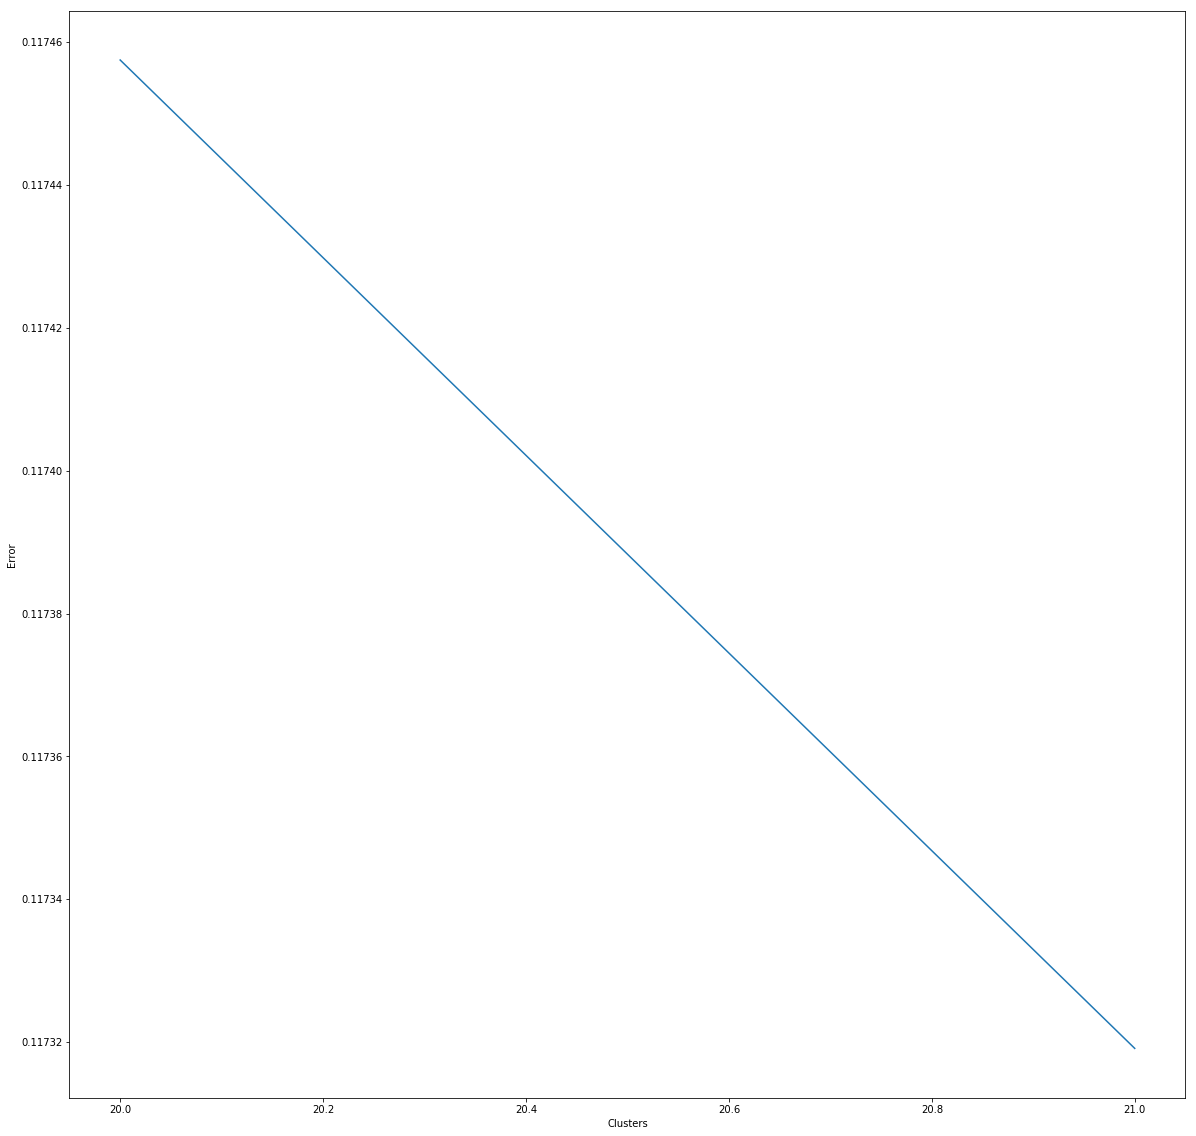

In [7]:
_visualization.plot_cluster_errors(Ks,Js)

For KMeans there was only a marginal Gain while increasing the clusters passing by this point. 
To make sure we made a bigger step otmizations to see where it will stop. 

In [8]:
best_K, Ks, Js = _optimizer.elbow_kmeans(X, min_k=2, step=100)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 0.13142188857296144
error = 0.13142188857296144
###############################
Number of Clusters: 102
Starting K-means++
Finished
J = 0.10630213962502835
error = 0.02511974894793309
###############################
Number of Clusters: 202
Starting K-means++
Finished
J = 0.10057068209483531
error = 0.005731457530193038
###############################

Best k: 202
Number of iterations: 4


J  [0.13142188857296144, 0.10630213962502835, 0.10057068209483531]
Ks  [2, 102, 202]


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

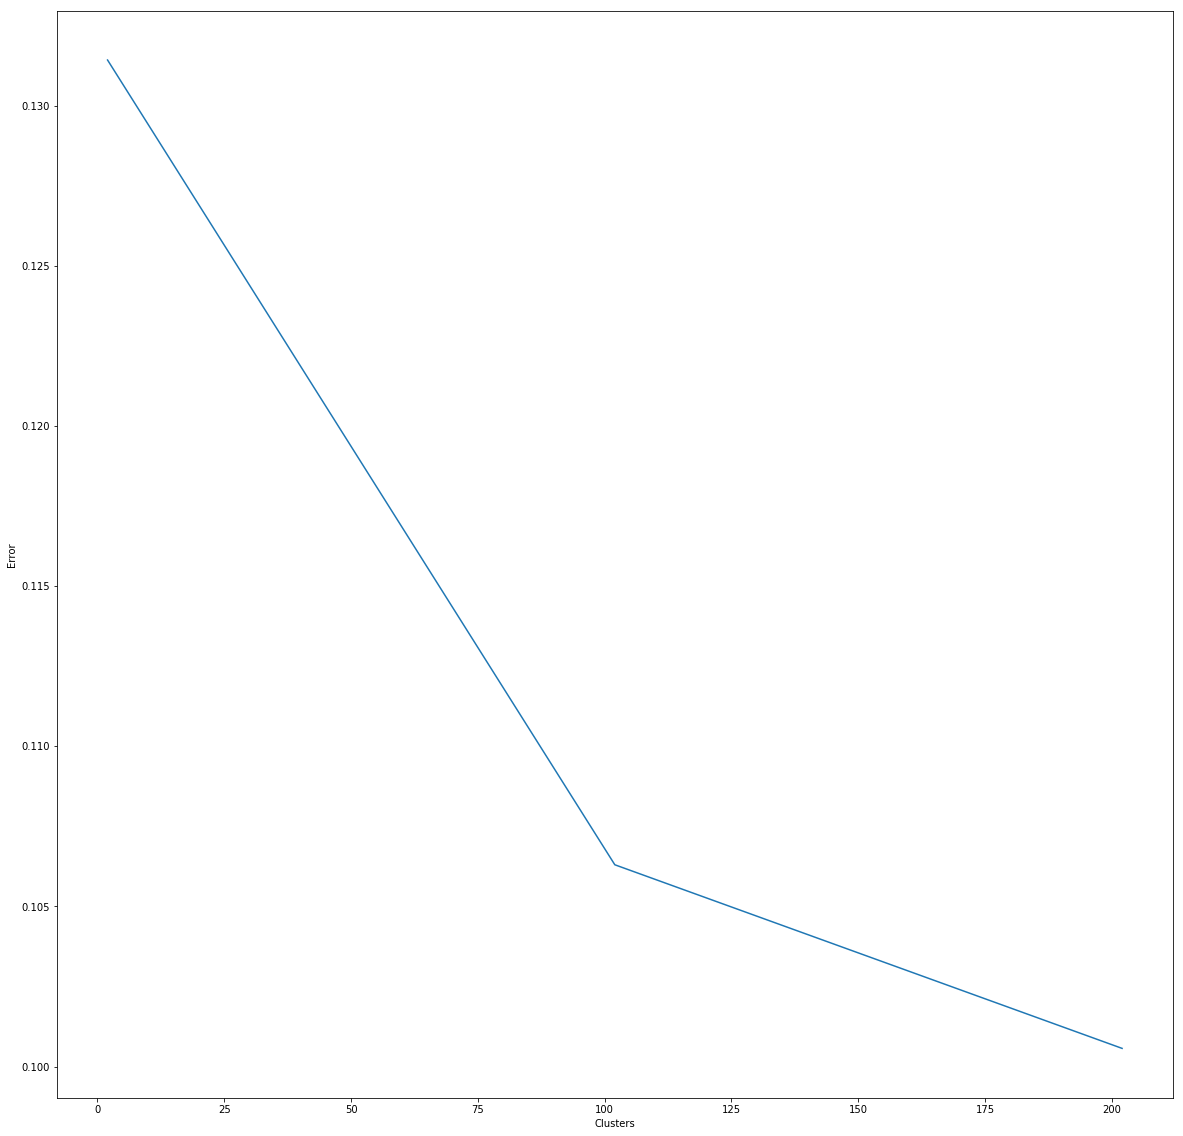

In [9]:
_visualization.plot_cluster_errors(Ks,Js)